<a href="https://colab.research.google.com/github/dianmulaza/simpleCNN-facemask/blob/main/facemask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!KAGGLE_CONFIG_DIR=`pwd` kaggle datasets download dhruvmak/face-mask-detection
!ls

 99% 192M/194M [00:02<00:00, 89.6MB/s]
100% 194M/194M [00:02<00:00, 89.4MB/s]
face-mask-detection.zip  kaggle.json  sample_data


In [2]:
!unzip -o face-mask-detection.zip
!ls

Archive:  face-mask-detection.zip
  inflating: dataset/with_mask/image_0.png  
  inflating: dataset/with_mask/image_1.png  
  inflating: dataset/with_mask/image_10.png  
  inflating: dataset/with_mask/image_100.png  
  inflating: dataset/with_mask/image_101.png  
  inflating: dataset/with_mask/image_102.png  
  inflating: dataset/with_mask/image_103.png  
  inflating: dataset/with_mask/image_104.png  
  inflating: dataset/with_mask/image_105.png  
  inflating: dataset/with_mask/image_106.png  
  inflating: dataset/with_mask/image_107.png  
  inflating: dataset/with_mask/image_108.png  
  inflating: dataset/with_mask/image_109.png  
  inflating: dataset/with_mask/image_11.png  
  inflating: dataset/with_mask/image_110.png  
  inflating: dataset/with_mask/image_111.png  
  inflating: dataset/with_mask/image_112.png  
  inflating: dataset/with_mask/image_113.png  
  inflating: dataset/with_mask/image_114.png  
  inflating: dataset/with_mask/image_115.png  
  inflating: dataset/with_mask/i

In [3]:
import os
print(len(os.listdir('dataset/with_mask')))
print(len(os.listdir('dataset/without_mask')))

220
220


# Split Data

In [4]:
import numpy as np
import shutil
import random
root_dir = 'dataset/' # data root path
classes_dir = ['with_mask', 'without_mask'] #total labels

for i in classes_dir:
  os.makedirs(root_dir +'train/' + i)
  os.makedirs(root_dir +'test/' + i)


test_ratio = 0.20

for cls in classes_dir:
    src = root_dir + cls

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - test_ratio))])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

    print("***********{}******************".format(cls))
    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Testing: ', len(test_FileNames))
    print("*****************************")


    for name in train_FileNames:
         shutil.copy(name, root_dir +'train/' + cls)

    for name in test_FileNames:
         shutil.copy(name, root_dir +'test/' + cls)
    print("Copying Done!")

***********with_mask******************
Total images:  220
Training:  176
Testing:  44
*****************************
Copying Done!
***********without_mask******************
Total images:  220
Training:  176
Testing:  44
*****************************
Copying Done!


In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

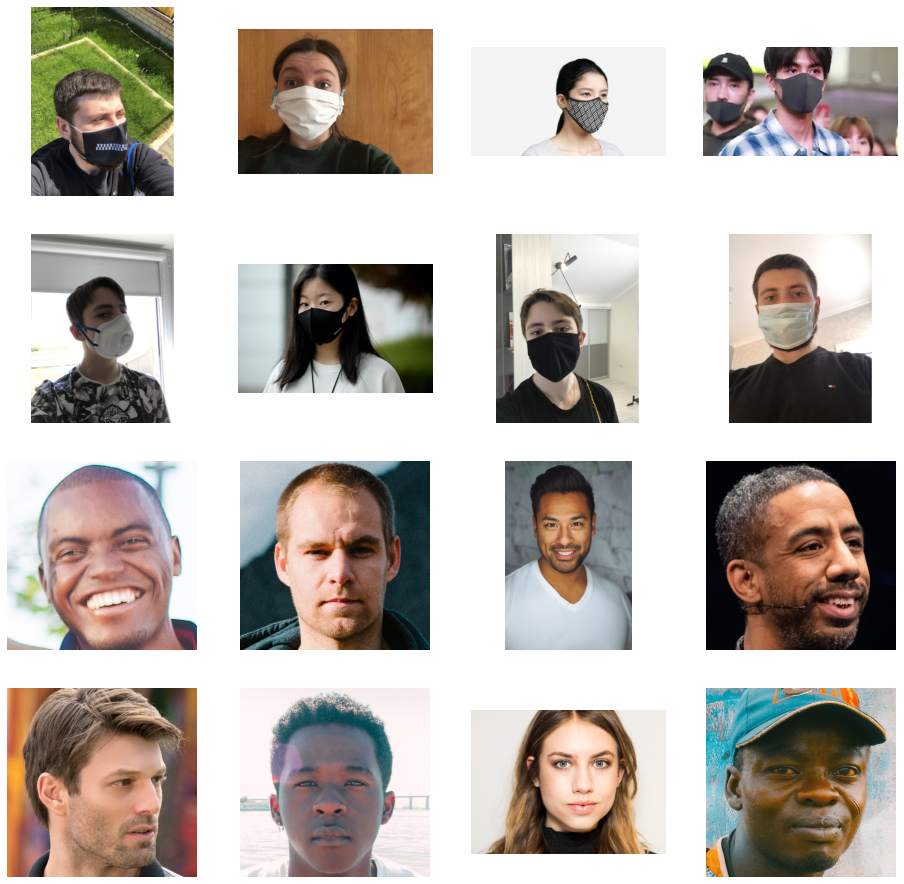

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

train_with='dataset/train/with_mask'
train_without='dataset/train/without_mask'
train_with_names=os.listdir(train_with)
train_without_names=os.listdir(train_without)

pic_index += 8
next_with_pix = [os.path.join(train_with, fname) 
                for fname in train_with_names[pic_index-8:pic_index]]
next_without_pix = [os.path.join(train_without, fname) 
                for fname in train_without_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_with_pix+next_without_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Build Model

In [7]:
import tensorflow as tf

In [8]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The forth convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('with_mask') and 1 for the other ('without mask')
    tf.keras.layers.Dense(1, activation='sigmoid')])
    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 32)        9

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir= 'dataset/train'
test_dir='dataset/test'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 352 images belonging to 2 classes.
Found 88 images belonging to 2 classes.


In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=17.6,  # 352 images = batch_size * steps
      epochs=25,
      validation_data=test_generator,
      validation_steps=4.4,  # 88 images = batch_size * steps
      verbose=1)

Epoch 1/25
17/17 [==============================] - 31s 2s/step - loss: 0.7091 - accuracy: 0.5669 - val_loss: 0.6502 - val_accuracy: 0.6818
Epoch 2/25
17/17 [==============================] - 28s 2s/step - loss: 0.7221 - accuracy: 0.6936 - val_loss: 0.5752 - val_accuracy: 0.8295
Epoch 3/25
17/17 [==============================] - 28s 2s/step - loss: 0.6378 - accuracy: 0.6991 - val_loss: 0.4920 - val_accuracy: 0.8295
Epoch 4/25
17/17 [==============================] - 28s 2s/step - loss: 0.6076 - accuracy: 0.6996 - val_loss: 1.0621 - val_accuracy: 0.5341
Epoch 5/25
17/17 [==============================] - 28s 2s/step - loss: 0.6485 - accuracy: 0.7218 - val_loss: 0.3923 - val_accuracy: 0.9091
Epoch 6/25
17/17 [==============================] - 28s 2s/step - loss: 0.4791 - accuracy: 0.8275 - val_loss: 0.4110 - val_accuracy: 0.8750
Epoch 7/25
17/17 [==============================] - 28s 2s/step - loss: 0.4458 - accuracy: 0.8407 - val_loss: 0.3513 - val_accuracy: 0.8295
Epoch 8/25
17/17 [==

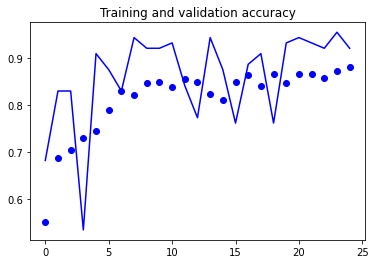

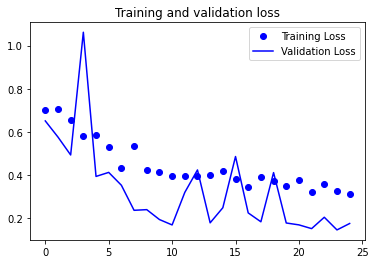

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


# Testing

Saving unnamed.jpg to unnamed.jpg
[1.]
unnamed.jpg not wear a mask


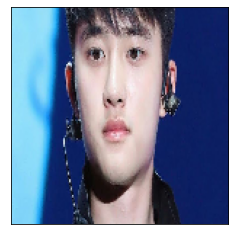

In [12]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " not wear a mask")
  else:
    print(fn + " wear a mask")

  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])